In [1]:
import numpy as np
import csv
from csv import DictReader
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
from time import gmtime, strftime
import datetime
from pywaffle import Waffle

In [2]:
with open("sleep_diary_march_2023.csv", "r") as f:
    reader = csv.DictReader(f)
    data = list(reader)

In [3]:
year = 2023
month = 3

weekday_label = [] 
values = [] 

for i in range(len(data)):
    time_start = (year, month, i+1, 12, 0, 0, 0, 0, 0)
    weekday_label.append(time_start)
    time_go_to_bad = eval(data[i].get('go_to_bad'))
    time_wake_up = eval(data[i].get('wake_up'))
    time_end = (year, month, i+2, 12, 0, 0, 0, 0, 0)     
    
    res_go_to_bad = tuple(map(lambda n, j: n - j, time_go_to_bad, time_start))
    res_sleep = tuple(map(lambda n, j: n - j, time_wake_up, time_go_to_bad))
    res_awake = tuple(map(lambda n, j: n - j, time_end, time_wake_up))
    
    val_1 = res_go_to_bad[2]*24 + res_go_to_bad[3]
    val_2 = res_sleep[2]*24 + res_sleep[3]
    val_3 = res_awake[2]*24 + res_awake[3]
    
    values.append([0, val_1, val_2, val_3])

In [4]:
value_waffle = [] 
for i in range(len(values)):
    if i==0:
        value_waffle.append([values[0][3], values[0][2], values[0][1], values[0][0]])
    elif i > 0 and values[i][3] < 0:
        value_waffle.append([0, 
                                 values[i][2]+values[i][3], 
                                 values[i][1], 
                                 values[i][0]])
    elif i > 0 and values[i-1][3] < 0:
        value_waffle.append([values[i][3], 
                                 values[i][2], 
                                 values[i][1]-abs(values[i-1][3]), 
                                 abs(values[i-1][3])])
    else:
        value_waffle.append([values[i][3], values[i][2], values[i][1], values[i][0]])
        
value_waffle_positiv = [0 if x<0 else x for x in sum(value_waffle, [])]

In [5]:
colors = []
for i in range(len(value_waffle_positiv)):
    if (i%2!=0):
        colors.append("#69BD3B")
    else:
        colors.append("#494B4D")

time_label = ["12:00", "18:00", "00:00", "06:00", "12:00"]

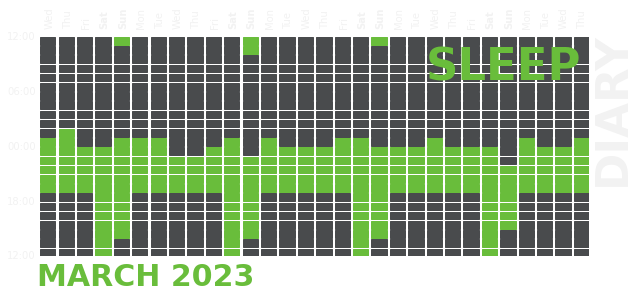

In [6]:
plt.figure(FigureClass = Waffle, rows = 24, values = value_waffle_positiv, colors = colors, 
           figsize=(9, 6), block_aspect_ratio = 2)

for i in range(len(time_label)):
    plt.text(-0.15, -0.01+0.25*i, time_label[i], color='#F2F2F2', fontsize=10)

for i in range(len(data)):
    if strftime("%a", gmtime(time.mktime(weekday_label[i]))) == 'Sat' or \
    strftime("%a", gmtime(time.mktime(weekday_label[i]))) == 'Sun':
        plt.text(0.020+i*0.0838, 1.05, strftime("%a", gmtime(time.mktime(weekday_label[i]))), 
             color='#F2F2F2', fontsize=10, weight='bold', rotation=90, ha='left')
    else:
        plt.text(0.020+i*0.0838, 1.05, strftime("%a", gmtime(time.mktime(weekday_label[i]))), 
             color='#F2F2F2', fontsize=10, rotation=90, ha='left')

plt.text(1.76, 0.805, "SLEEP", color='#69BD3B', fontsize=45, weight='bold')
plt.text(2.51, 0.365, "DIARY", color='#F2F2F2', fontsize=45, weight='bold', rotation=90)
plt.text(-0.012, -0.13, strftime("%B", gmtime(time.mktime(weekday_label[1]))).upper() + f' {year}', 
         color='#69BD3B', fontsize=30, weight='bold')

plt.savefig('waffle_chart_sleep_diary.png', dpi=300, facecolor='#222222', bbox_inches="tight")
plt.show()